<a href="https://colab.research.google.com/github/TristanNUSantos/Emtech2/blob/main/Hands_on_Activity_1_2_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks

Name: Santos Tristan Neal U.
Section: CPE32S9

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
646,1,167,74,17,144,23.4,0.447,33,1
260,3,191,68,15,130,30.9,0.299,34,0
510,12,84,72,31,0,29.7,0.297,46,1
74,1,79,75,30,0,32.0,0.396,22,0
632,2,111,60,0,0,26.2,0.343,23,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

#

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                108       
                                                                 
 dense_25 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 2s 12ms/step - loss: 0.7329 - accuracy: 0.6389 - val_loss: 0.7826 - val_accuracy: 0.5833
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.6441 - val_loss: 0.7590 - val_accuracy: 0.5885
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.6510 - val_loss: 0.7384 - val_accuracy: 0.5729
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.6528 - val_loss: 0.7201 - val_accuracy: 0.5938
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6562 - val_loss: 0.7039 - val_accuracy: 0.5885
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6684 - val_loss: 0.6892 - val_accuracy: 0.6042
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.6684 - val_loss: 0.6761 - val_accuracy: 0.5990
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 =(model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)


6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.57696533],
       [0.61074233],
       [0.35749418],
       [0.25565723],
       [0.16068557],
       [0.47349155],
       [0.01845897],
       [0.43593693],
       [0.917828  ],
       [0.16583294]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.776
roc-auc is 0.817


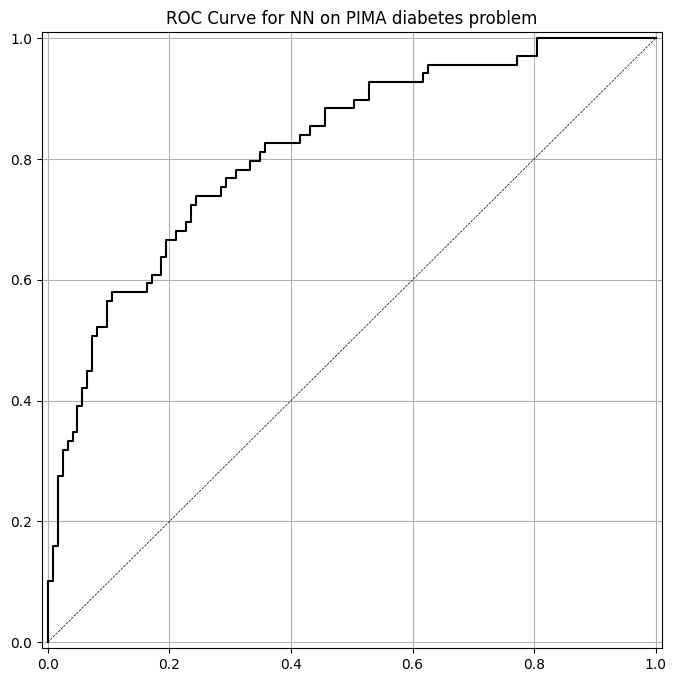

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

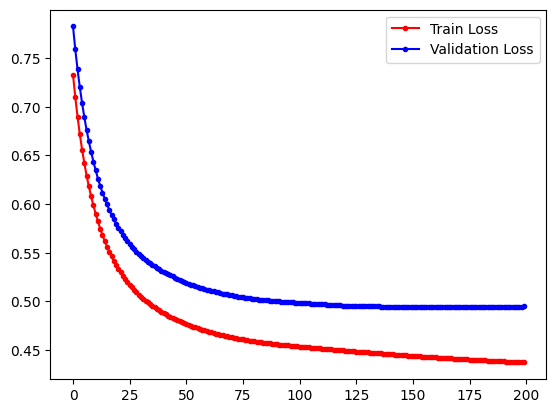

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

The graph showcase the curve each are on a diagonal line with the first part on the top before descending as it goes forward, which indicate that the prediction of this model are good. The 2nd graph indicates the train loss decrease, which proves that the validation is the same despite a different graph design.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
winedf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/WineQT.csv")

In [ ]:
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
winedf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [ ]:
## Split the data into train and test (80%, 20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

In [ ]:
## Normalize the data

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:

model2 = Sequential([
    Dense(10, input_shape=(8,), activation="relu"),
    Dense(1, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                90        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist2 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)


Epoch 1/1500
18/18 [==============================] - 0s 10ms/step - loss: 0.4371 - accuracy: 0.7795 - val_loss: 0.4948 - val_accuracy: 0.7760
Epoch 2/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.4370 - accuracy: 0.7795 - val_loss: 0.4949 - val_accuracy: 0.7760
Epoch 3/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.4369 - accuracy: 0.7812 - val_loss: 0.4949 - val_accuracy: 0.7760
Epoch 4/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.4367 - accuracy: 0.7812 - val_loss: 0.4950 - val_accuracy: 0.7760
Epoch 5/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.4366 - accuracy: 0.7795 - val_loss: 0.4950 - val_accuracy: 0.7760
Epoch 6/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.4366 - accuracy: 0.7795 - val_loss: 0.4951 - val_accuracy: 0.7760
Epoch 7/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.4363 - accuracy: 0.7795 - val_loss: 0.4951 - val_accuracy: 0.7760
Epoch

In [ ]:
y_pred_class_nn_2 = (model2.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_2 = model2.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class_nn_2[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_2[:10]

array([[0.4210953 ],
       [0.32313898],
       [0.47941372],
       [0.48243412],
       [0.5       ],
       [0.38059798],
       [0.5       ],
       [0.4251052 ],
       [0.40425262],
       [0.5       ]], dtype=float32)

In [ ]:
run_hist2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

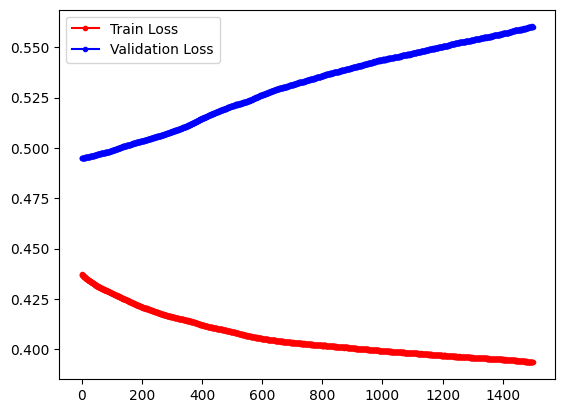

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()











#### Conclusion

In conclusion, this lesson is about from using the previous lesson about Neural Network and applying it on a different model and layer to showcase the graphical result. This is similar from prediction regression but the difference here is the iteration of epochs involved here in order to get the data we need and showcase it, which sometimes has some presentation errors if not properly input the right code for it. The graph we use here is about predicting training loss and validation loss that decreases, to know that the model of prediction is in the right classification.